## Activity 14: Test normality of data attributes (columns) and carry out

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [2]:
import sklearn as sk
from scipy import stats
from sklearn import preprocessing


In [3]:
df = pd.read_csv('Dataset/bank.csv', sep=';')

In [4]:
DV = 'y'
df[DV]= df[DV].astype('category')
df[DV] = df[DV].cat.codes


In [5]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [6]:
# selecting the target variable (dependent variable) as y
y_train = train[DV]

In [7]:
train = train.drop(columns=[DV])
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure


In [8]:
numeric_df = train._get_numeric_data()

In [9]:
numeric_df_array = np.array(numeric_df)
loop_c = -1
col_for_normalization = list()

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        col_for_normalization.append((loop_c)) # applicable if yeo-johnson is used
        
        #if min(x) > 0: # applicable if box-cox is used
            #col_for_normalization.append((loop_c)) # applicable if box-cox is used
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")


p = 1.29072e-59
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 2.84809e-241
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution


In [10]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=True)

In [11]:
columns_to_normalize = numeric_df[numeric_df.columns[col_for_normalization]]
names_col = list(columns_to_normalize)


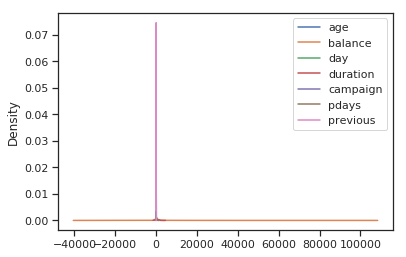

In [12]:
columns_to_normalize.plot.kde(bw_method=3)

In [13]:
normalized_columns = pt.fit_transform(columns_to_normalize)
normalized_columns = pd.DataFrame(normalized_columns, columns=names_col)


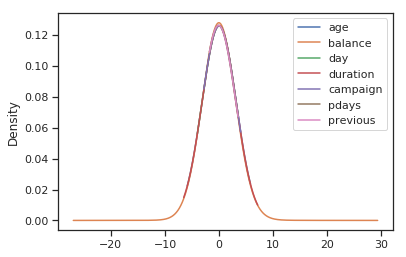

In [14]:
normalized_columns.plot.kde(bw_method=3)

In [15]:
numeric_df_array = np.array(normalized_columns) 
loop_c = -1

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")


p = 1.10663e-22
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 2.59778e-172
The null hypothesis can be rejected: non-normal distribution
p = 0.0161177
The null hypothesis cannot be rejected: normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 6.18833e-195
The null hypothesis can be rejected: non-normal distribution
p = 6.71541e-195
The null hypothesis can be rejected: non-normal distribution


In [16]:
columns_to_notnormalize = numeric_df
columns_to_notnormalize.drop(columns_to_notnormalize.columns[col_for_normalization], axis=1, inplace=True)


In [17]:
numeric_df_normalized = pd.concat([columns_to_notnormalize.reset_index(drop=True), normalized_columns], axis=1)

In [18]:
numeric_df_normalized

,age,balance,day,duration,campaign,pdays,previous
0,-1.156538,0.283019,0.429972,-0.895396,-1.119855,-0.473146,-0.473197
1,-0.754050,1.204948,-0.527080,0.165412,-1.119855,2.136505,2.170373
2,-1.156538,0.176588,-1.728661,0.054337,1.071271,-0.473146,-0.473197
3,1.517383,-0.436775,-1.386927,0.195478,-1.119855,-0.473146,-0.473197
4,-0.509842,-0.089993,0.862200,-0.315041,0.114653,2.118878,2.165274
5,-0.069182,-0.348248,-1.229683,-0.243054,0.114653,-0.473146,-0.473197
6,0.130787,-0.311989,-0.150222,-1.200759,0.114653,-0.473146,-0.473197
7,0.319081,-0.620278,0.203965,0.568766,-1.119855,2.112711,2.145878
8,-0.069182,2.441666,0.540346,0.409910,-1.119855,-0.473146,-0.473197
9,0.319081,-0.291871,0.203965,-0.542725,0.114653,-0.473146,-0.473197
